In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df_train = pd.read_csv("./data/train.csv", index_col="seq_id")
df_train_updates = pd.read_csv("./data/train_updates_20220929.csv", index_col="seq_id")

all_features_nan = df_train_updates.isnull().all("columns")

drop_indices = df_train_updates[all_features_nan].index
df_train = df_train.drop(index=drop_indices)

swap_ph_tm_indices = df_train_updates[~all_features_nan].index
df_train.loc[swap_ph_tm_indices, ["pH", "tm"]] = df_train_updates.loc[swap_ph_tm_indices, ["pH", "tm"]]

In [46]:
def view_meta(x):
    print(f"Mean:               {np.mean(x)}")
    print(f"Standard Deviation: {np.std(x)}")
    print(f"Minimum:            {np.min(x)}")
    print(f"Maximum:            {np.max(x)}")

In [43]:
seq = df_train["protein_sequence"]
pH = df_train["pH"]
tm = df_train["tm"]
seq_lengths = [len(x) for x in seq]
print(f"df size: {len(tm)}")

df size: 28981


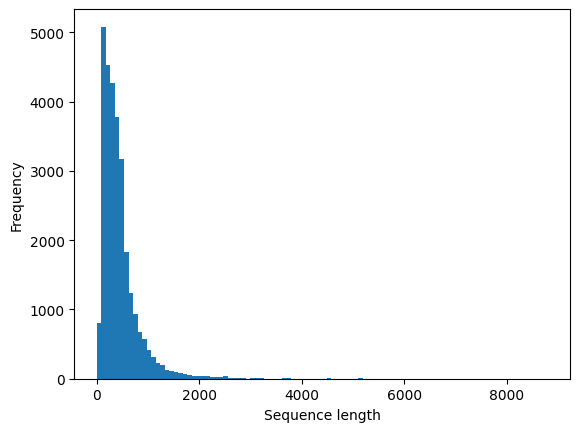

Mean:               450.468617370001
Standard Deviation: 415.15188618105293
Minimum:            5
Maximum:            8798


In [53]:
plt.hist(seq_lengths, bins=100)
plt.xlabel("Sequence length")
plt.ylabel("Frequency")
plt.show()
view_meta(seq_lengths)

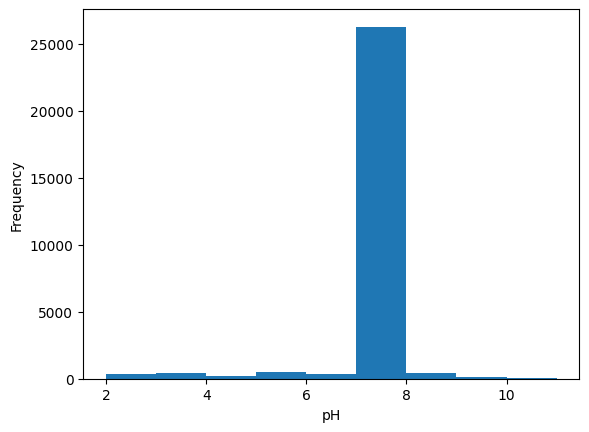

Mean:               6.872467328802927
Standard Deviation: 0.7931703093788306
Minimum:            1.99
Maximum:            11.0


In [54]:
plt.hist(pH, bins=9)
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()
view_meta(pH)

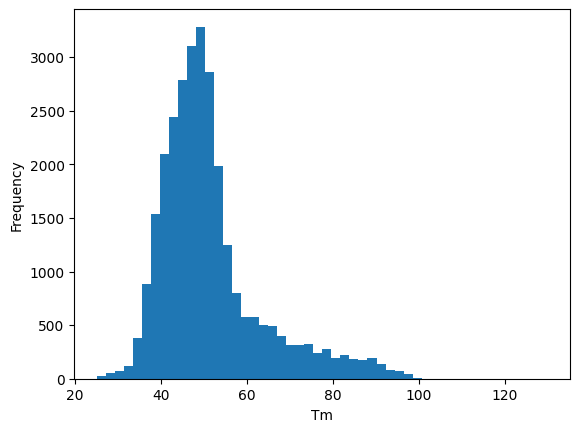

Mean:               51.36000483075119
Standard Deviation: 12.056509045262123
Minimum:            25.1
Maximum:            130.0


In [55]:
plt.hist(tm, bins=50)
plt.xlabel("Tm")
plt.ylabel("Frequency")
plt.show()
view_meta(tm)

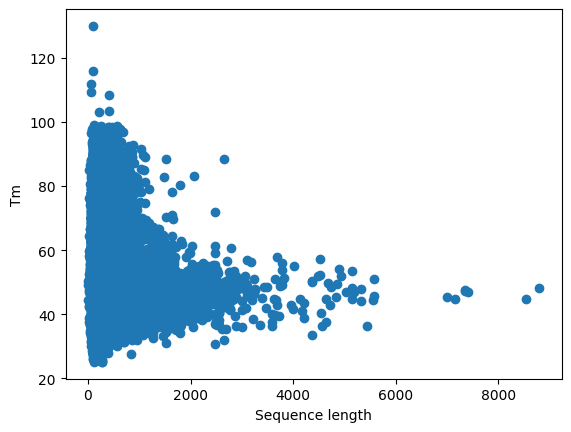

In [56]:
plt.scatter(seq_lengths, tm)
plt.xlabel("Sequence length")
plt.ylabel("Tm")
plt.show()